In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/train.csv
/kaggle/input/fake-news/submit.csv
/kaggle/input/fake-news/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
Y = df.label
Y.tail()

20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, dtype: int64

In [4]:
X = df.drop(['label'],axis=1)
X.tail()

,id,title,author,text
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa..."


In [5]:
df.groupby('author').sum().sort_values(by=['label'],ascending=False).head(10)

,id,label
author,,
admin,2059111,193
Pakalert,900088,86
Eddy Lavine,915381,85
Starkman,868068,84
Gillian,783635,82
Alex Ansary,972047,82
Editor,914153,81
noreply@blogger.com (Alexander Light),800489,80
Dave Hodges,835200,77


In [6]:
authors_df = pd.DataFrame()
authors_df = df.groupby('author').count().reset_index()[['author','label']]
authors_df.columns = ['Author','Total number of articles written']
authors_df

,Author,Total number of articles written
0,# 1 NWO Hatr,17
1,-NO AUTHOR-,54
2,10 Habits That Will Make Your Life Easier &amp...,1
3,10 More Beautiful Images That Remind You We St...,1
4,10 Movies That Could Change Your Understanding...,1
...,...,...
4196,تييري ميسان,1
4197,جنگ ارزی آمریکا علیه ایران / مورد مطالعاتی سال...,1
4198,سعيد هلال الشريفي,1
4199,“SHOOT FIRST ASK QUESTIONS LATER” : WHAT HAPPE...,1


In [7]:
authors_df['Number of fake articles written'] = df.groupby('author').sum().reset_index()['label']
authors_df['Percentage Fake'] = 100*authors_df['Number of fake articles written']/authors_df['Total number of articles written']
authors_df.sort_values(by=['Total number of articles written'],ascending=False)

,Author,Total number of articles written,Number of fake articles written,Percentage Fake
2944,Pam Key,243,1,0.411523
3929,admin,193,193,100.000000
1762,Jerome Hudson,166,0,0.000000
724,Charlie Spiering,141,0,0.000000
1857,John Hayward,140,0,0.000000
...,...,...,...,...
1840,John Bentley,1,1,100.000000
128,Alan Rappeport and Yamiche Alcindor,1,0,0.000000
127,Alan Rappeport and Noah Weiland,1,0,0.000000
1844,John Clarke,1,0,0.000000


In [8]:
fil = (authors_df['Total number of articles written'] >= 10)
imp_authors = authors_df[fil].reset_index().drop('index',axis=1)
imp_authors

,Author,Total number of articles written,Number of fake articles written,Percentage Fake
0,# 1 NWO Hatr,17,17,100.0
1,-NO AUTHOR-,54,54,100.0
2,A. O. Scott,13,0,0.0
3,AP,11,0,0.0
4,AWR Hawkins,107,0,0.0
...,...,...,...,...
392,shorty,58,58,100.0
393,stevew,45,45,100.0
394,tokyowashi (noreply@blogger.com),17,17,100.0
395,voltairenet.org,18,18,100.0


In [9]:
fil2 = (imp_authors['Percentage Fake'] >= 1)
fake_authors = imp_authors[fil2].reset_index().drop('index',axis=1)
fake_authors.sort_values(by=['Total number of articles written'],ascending=False)

,Author,Total number of articles written,Number of fake articles written,Percentage Fake
156,admin,193,193,100.0
105,Pakalert,86,86,100.0
56,Eddy Lavine,85,85,100.0
130,Starkman,84,84,100.0
6,Alex Ansary,82,82,100.0
...,...,...,...,...
153,Xavi Puig,10,10,100.0
89,Kim Smith,10,10,100.0
94,MM,10,10,100.0
75,Ian Greenhalgh,10,10,100.0


In [10]:
fake_authors['Percentage Fake'].value_counts()

100.000000    170
23.809524       1
Name: Percentage Fake, dtype: int64

We can thus observe that fake news is hardly a mistake on the part of author. Except for one, every other fake author seems to write fake news intentionally.

In [11]:
fil3 = (imp_authors['Percentage Fake'] < 1)
credible_authors = imp_authors[fil3].reset_index().drop('index',axis=1)
credible_authors.sort_values(by=['Total number of articles written'],ascending=False)

,Author,Total number of articles written,Number of fake articles written,Percentage Fake
174,Pam Key,243,1,0.411523
103,Jerome Hudson,166,0,0.000000
46,Charlie Spiering,141,0,0.000000
111,John Hayward,140,0,0.000000
124,Katherine Rodriguez,124,0,0.000000
...,...,...,...,...
62,Dave Philipps,10,0,0.000000
154,Michael R. Gordon,10,0,0.000000
197,Sam Sifton,10,0,0.000000
119,Juliet Macur,10,0,0.000000


In [12]:
credible_authors['Percentage Fake'].value_counts()

0.000000    225
0.411523      1
Name: Percentage Fake, dtype: int64

# NLP 
We will use the following basics of Natural Language Processing in this problem. 
1. **Removing Stopwords:** Stop words are words like if, but etc., that do not have any importance for the machine to learn. We will have to remove them from the list of words so as to obtain the list of key words only. 
2. **Stemming:** It is reducing a word to its root form. For example, the root form of "Walking" is "walk" ; "consultant" should be reduced to "consult". 
3. **Removing Special Characters:** So as to clean the words. Helps in eliminating any errors. 

In [13]:
#Removing stopwords
from nltk.corpus import stopwords
#These are the following stopwords that will have to be removed
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:
example_words = ['if','Walking','can','Bathed','Consultant']
key_words = [word for word in example_words if not word in stopwords.words('english')]
key_words

['Walking', 'Bathed', 'Consultant']

In [15]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

example_words = ['walking','reading','consultant','Laughed']
stemmed_words = [ps.stem(word) for word in example_words]
stemmed_words

['walk', 'read', 'consult', 'laugh']

In [16]:
# Removing Special Characters:
import regex as re
s = "This is an explainer on NLP #1 for $10"
without_specialchar = re.sub('[^a-z,A-Z,0-9]',' ',s)
without_specialchar

'This is an explainer on NLP  1 for  10'

In [17]:
without_specialchar.lower().split()

['this', 'is', 'an', 'explainer', 'on', 'nlp', '1', 'for', '10']

Now let's combine all our learnings to clean the titles of all the news articles. We will convert every title into a list of key words, which we will analyse next.

In [18]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [19]:
articles = df.dropna().reset_index().drop('index',axis=1)
articles.tail()

,id,title,author,text,label
18280,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
18284,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [20]:
corpus = []
for i in range(0,len(articles)):
    title = re.sub('[^a-z,A-Z]',' ',articles['title'][i]).lower().split()
    #Removing stopwords and stemming
    title_keywords = [ps.stem(word) for word in title if not word in stopwords.words('english')]
    title_processed = ' '.join(title_keywords)
    corpus.append(title_processed)

In [21]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton, big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia, courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'yes, paid govern troll social media, blogs, forum websit',
 'major leagu soccer, argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi clo

A machine learning algorithm cannot understand words. It can only deal with numbers. So for applying ML algorithms on the corpus of titles created, we should learn Vectorization. Vectorization is the process of converting each string to a vector of numbers. This vector will be the input to the ML algorithm. There are different ways of vectorising a string. We'll see how Count Vectorization works. 

## Count Vectorization - Bag of Words Model:
**Basic Implementation:**
* Firstly, assign a unique number to each unique word in the string. This unique number will be the index position of the word in the vector. 
* Then, count the number of times each of these unique words are repeated. This count values will be the values in the vector. 

**Advanced Implementation:**
* You can also assign a unique number to a group of words instead of a single word using n_gram_range method. 
* You need not select all the words from the string. Using max_features method, you can only select most commonly repeated words. 

We'll try to understand implementation using an example. 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [23]:
text = ['This is an NLP explainer on NLP #1 for $10 NLP']

#Fit each unique word in the string to a unique number. 
vectorizer.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
print(vectorizer.vocabulary_)

{'this': 7, 'is': 4, 'an': 1, 'nlp': 5, 'explainer': 2, 'on': 6, 'for': 3, '10': 0}


In [25]:
# Create a vector with 'count values' of each unique word. 
vector = vectorizer.transform(text)
vector

<1x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [26]:
print(vector.shape)
print(type(vector))
print(vector.toarray())

(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 3 1 1]]


* The index of the array denotes the unique word. For example vector[5] = 'nlp'
* Values in the array denotes the frequency of the word. 'nlp' has frequency 3.

Now, let's apply count vectorization on all the strings in our corpus. This is called Bag of Words model because, all the words in the entire corpus will be treated alike and will be given a unique number. If that word is present in a string, we see a value representing number of times it was repeated at the corresponsing index position. 

In [27]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
#Fit the words to unique number and transform the text into a vector. 
vectors = cv.fit_transform(corpus).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
print(len(cv.vocabulary_))

5000


In [29]:
cv.vocabulary_

{'hous': 2057,
 'dem': 1108,
 'aid': 87,
 'even': 1460,
 'see': 3872,
 'comey': 833,
 'letter': 2465,
 'jason': 2248,
 'chaffetz': 651,
 'tweet': 4620,
 'comey letter': 835,
 'jason chaffetz': 2249,
 'flynn': 1671,
 'hillari': 1994,
 'clinton': 758,
 'big': 391,
 'woman': 4914,
 'campu': 582,
 'breitbart': 497,
 'hillari clinton': 1996,
 'campu breitbart': 583,
 'truth': 4604,
 'might': 2703,
 'get': 1800,
 'fire': 1633,
 'civilian': 740,
 'kill': 2348,
 'singl': 3990,
 'us': 4677,
 'airstrik': 96,
 'identifi': 2097,
 'us airstrik': 4678,
 'iranian': 2205,
 'jail': 2237,
 'stori': 4174,
 'stone': 4171,
 'death': 1070,
 'mason': 2620,
 'hollywood': 2028,
 'would': 4947,
 'love': 2543,
 'trump': 4501,
 'bomb': 452,
 'north': 2938,
 'korea': 2374,
 'lack': 2391,
 'tran': 4461,
 'bathroom': 339,
 'exclus': 1482,
 'video': 4725,
 'north korea': 2941,
 'video breitbart': 4726,
 'win': 4892,
 'french': 1731,
 'socialist': 4037,
 'parti': 3135,
 'presidenti': 3367,
 'nomin': 2934,
 'new': 2874

* Not only every word, but group of every 2 and 3 words are also given a unique number because we used n_gram_range=(1,3)
* Not all words and groups of words are selected. Only 5000 most common words are selected.

We can make a dataframe out of this vectorized results for better understanding. 

In [30]:
vectors_df = pd.DataFrame(vectors, columns = cv.get_feature_names())
vectors_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Machine Learning!

In [31]:
# Prepare the input and output variables
X = vectors
y = articles['label']

In [32]:
# Split the data into test and train datasets. 
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [34]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [35]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


accuracy:   0.934
Confusion matrix, without normalization


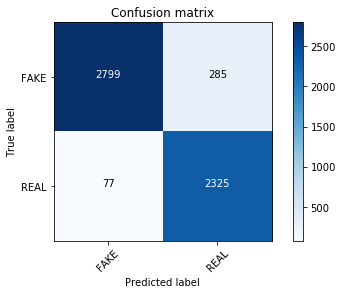

In [36]:
from sklearn import metrics
import itertools


score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


In [37]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## References:
1. https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/